<a href="https://colab.research.google.com/github/marastika/GAN_BUKALAPAK/blob/main/METHOD_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the CSV file
file_path = '/content/Data-scrapping-komentar-e-commerce-BUKALAPAK.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data_head = data.head()
data_info = data.info()

data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  133 non-null    float64
 1   Nama pemilik        133 non-null    object 
 2   Nama Toko           133 non-null    object 
 3   Produk              133 non-null    object 
 4   Nama akun pembeli   133 non-null    object 
 5   Profil gambar akun  133 non-null    object 
 6   Deteksi Akun        133 non-null    object 
 7   Review /Komentar    133 non-null    object 
 8   Rating bintang      133 non-null    float64
 9   Sentimen            133 non-null    object 
 10  Source              133 non-null    object 
 11  Data_Review         133 non-null    object 
 12  Month               133 non-null    object 
 13  YEAR                133 non-null    float64
 14  LINK                133 non-null    object 
 15  Unnamed: 15         0 non-null      float64
 16  Unname

(    No            Nama pemilik  \
 0  1.0  Imam Nashokha, S.Pd.\n   
 1  2.0  Imam Nashokha, S.Pd.\n   
 2  3.0  Imam Nashokha, S.Pd.\n   
 3  4.0  Imam Nashokha, S.Pd.\n   
 4  5.0  Imam Nashokha, S.Pd.\n   
 
                                            Nama Toko  \
 0  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 1  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 2  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 3  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 4  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 
                                               Produk  \
 0  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 1  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 2  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 3  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 4  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 
           Nama akun pembeli  \
 0           Fakih Zuhrianto   
 1          Ceppy Priagung\n   
 2  

In [2]:
# Drop rows with missing values in relevant columns
cleaned_data = data[['Review /Komentar', 'Rating bintang', 'Sentimen']].dropna()

# Convert the sentiment labels to binary (1 for POSITIVE, 0 for NEGATIVE)
cleaned_data['Sentimen'] = cleaned_data['Sentimen'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

# Check the cleaned data
cleaned_data.head(), cleaned_data['Sentimen'].value_counts()


(                                    Review /Komentar  Rating bintang  Sentimen
 0                      Jelek hp nyah bekass lem nyah             3.0         0
 1   barang bagus, pengemasan cepat, semua fungsi ...             4.0         0
 2  Recomended seller, terimakasih atas kejujurann...             5.0         0
 3                             Barang bagus banget!\n             5.0         0
 4                           Barang bagus banget!\n\n             5.0         0,
 Sentimen
 0    133
 Name: count, dtype: int64)

In [3]:
# Focus on the relevant columns: review text and account detection status
# Drop rows with missing values in these columns
fake_review_data = data[['Review /Komentar', 'Deteksi Akun']].dropna()

# Encode the target variable (1 for fake, 0 for real)
fake_review_data['Deteksi Akun'] = fake_review_data['Deteksi Akun'].apply(lambda x: 1 if x == 'Buatan' else 0)

# Check the distribution of the target variable
target_distribution = fake_review_data['Deteksi Akun'].value_counts()

# Display the first few rows and the distribution
fake_review_data.head(), target_distribution


(                                    Review /Komentar  Deteksi Akun
 0                      Jelek hp nyah bekass lem nyah             1
 1   barang bagus, pengemasan cepat, semua fungsi ...             1
 2  Recomended seller, terimakasih atas kejujurann...             0
 3                             Barang bagus banget!\n             0
 4                           Barang bagus banget!\n\n             1,
 Deteksi Akun
 0    105
 1     28
 Name: count, dtype: int64)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into features (X) and target (y)
X = fake_review_data['Review /Komentar']
y = fake_review_data['Deteksi Akun']

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'])

accuracy, conf_matrix, report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7037037037037037,
 array([[19,  0],
        [ 8,  0]]),
 '              precision    recall  f1-score   support\n\n        Real       0.70      1.00      0.83        19\n        Fake       0.00      0.00      0.00         8\n\n    accuracy                           0.70        27\n   macro avg       0.35      0.50      0.41        27\nweighted avg       0.50      0.70      0.58        27\n')

In [5]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_vect, y)

# Split the SMOTE data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train a Logistic Regression model on the balanced data
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test_smote)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test_smote, y_pred_smote)
report_smote = classification_report(y_test_smote, y_pred_smote, target_names=['Real', 'Fake'])

accuracy_smote, conf_matrix_smote, report_smote


(0.6428571428571429,
 array([[ 6, 14],
        [ 1, 21]]),
 '              precision    recall  f1-score   support\n\n        Real       0.86      0.30      0.44        20\n        Fake       0.60      0.95      0.74        22\n\n    accuracy                           0.64        42\n   macro avg       0.73      0.63      0.59        42\nweighted avg       0.72      0.64      0.60        42\n')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load your dataset (assuming data is already loaded)
# data = pd.read_csv('your_data.csv')  # Example if you need to load the data

# Select relevant columns and drop missing values
cleaned_data = data[['Review /Komentar', 'Deteksi Akun']].dropna() # Include 'Deteksi Akun' in the column selection

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_data['Review /Komentar'])
y = cleaned_data['Deteksi Akun'].apply(lambda x: 1 if x == 'Buatan' else 0)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the SMOTE data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train a Logistic Regression model on the balanced data
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test_smote)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test_smote, y_pred_smote)
report_smote = classification_report(y_test_smote, y_pred_smote, target_names=['Real', 'Fake'])

print(f"Accuracy after SMOTE: {accuracy_smote * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_smote)
print("Classification Report:")
print(report_smote)

Accuracy after SMOTE: 64.29%
Confusion Matrix:
[[ 6 14]
 [ 1 21]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.86      0.30      0.44        20
        Fake       0.60      0.95      0.74        22

    accuracy                           0.64        42
   macro avg       0.73      0.63      0.59        42
weighted avg       0.72      0.64      0.60        42



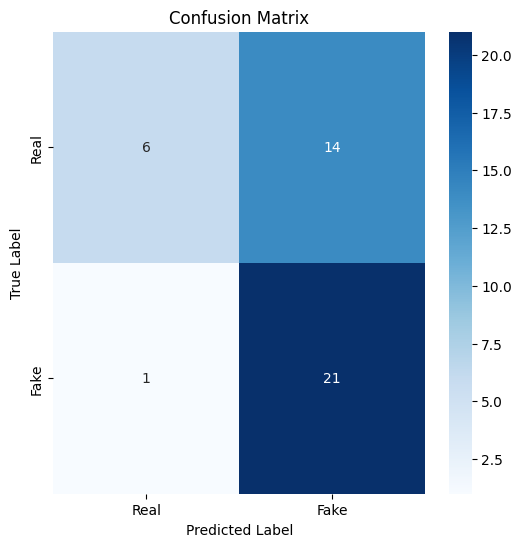

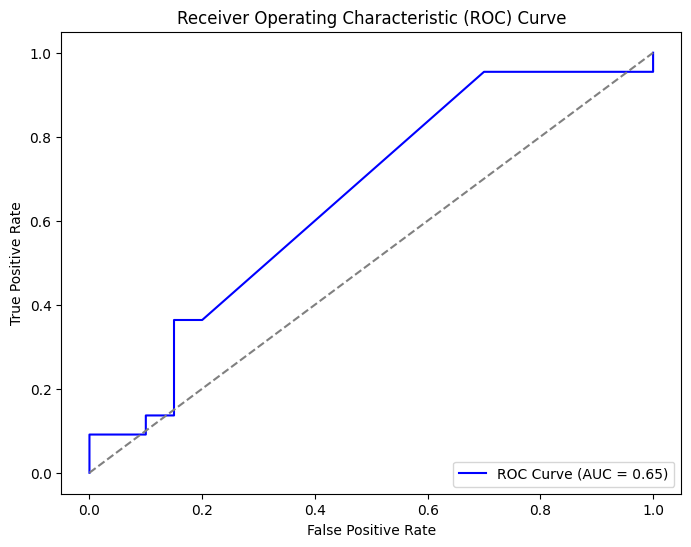

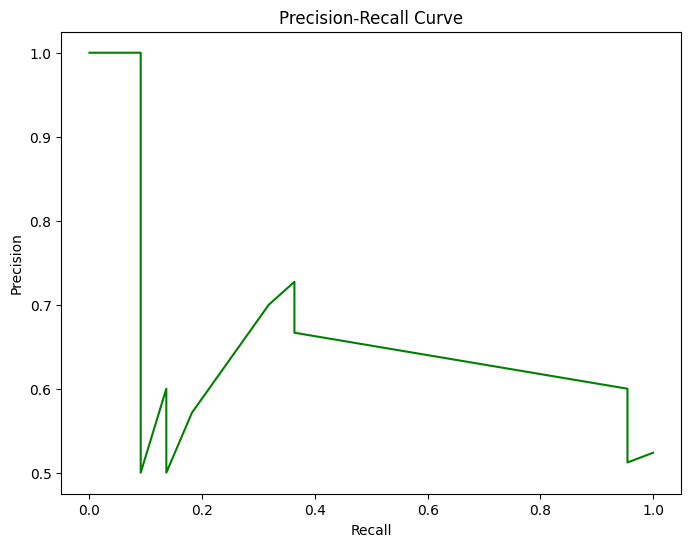

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_test, y_pred_prob):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix_smote, classes=['Real', 'Fake'])

# Plot the ROC curve
y_pred_prob_smote = model_smote.predict_proba(X_test_smote)[:, 1]
plot_roc_curve(y_test_smote, y_pred_prob_smote)

# Plot the Precision-Recall curve
plot_precision_recall_curve(y_test_smote, y_pred_prob_smote)


In [ ]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train_smote, y_train_smote)
y_pred_svm = model_svm.predict(X_test_smote)
